# Load Packages


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  

# Import the dataset

In [103]:
df = pd.read_csv ("glass.csv")
df2 = df.set_index('Type')
df2.head()
print (df2.head())

           RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
Type                                                         
1     1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1     1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
1     1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
1     1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
1     1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0


# Checking Data Types

In [104]:
print (df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


# checking rows for duplicate data

In [105]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicated rows: ", duplicate_rows_df.shape)

number of duplicated rows:  (1, 10)


# count the number of null values in each column

In [106]:
print(df2.isnull().sum())

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64


# print summary statictics

In [107]:
print(df2.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%   

Extract Labels to a different data frame.

In [108]:
x = df.drop('Type', axis = 1)
y = df['Type']

# Plot the training set

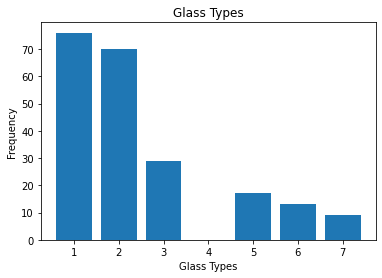

In [109]:
glass= y.unique()
values = y.value_counts()

plt.bar(glass, values)
plt.title("Glass Types")
plt.xlabel("Glass Types")
plt.ylabel("Frequency")
plt.show()

# explore data values

In [110]:
x.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


# convert data to use with keras for normalisation

In [111]:
x = df.values
x = normalize(x)
print (x[0])

[2.06227172e-02 1.84938864e-01 6.08779693e-02 1.49144245e-02
 9.73233994e-01 8.13514066e-04 1.18637468e-01 0.00000000e+00
 0.00000000e+00 1.35585678e-02]


# convert label 

In [112]:
y = to_categorical(y)
y.shape

(214, 8)

# Split the data for training

In [113]:
x, x_val, y, y_val = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5)

# Create the model

In [114]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(256, input_shape=(10,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
            
    tf.keras.layers.Dense(8, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['acc'])

model
    

# view the model

In [115]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               2816      
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 256)              

# train the model

In [116]:


history = model.fit(x, y,
                    epochs=400,
                    validation_data=(x_val, y_val),
                    verbose=2,
                   )



Epoch 1/400
6/6 - 1s - loss: 3.5801 - acc: 0.0877 - val_loss: 2.0732 - val_acc: 0.0000e+00 - 624ms/epoch - 104ms/step
Epoch 2/400
6/6 - 0s - loss: 3.0348 - acc: 0.1813 - val_loss: 2.0692 - val_acc: 0.0000e+00 - 16ms/epoch - 3ms/step
Epoch 3/400
6/6 - 0s - loss: 2.6241 - acc: 0.1988 - val_loss: 2.0644 - val_acc: 0.0000e+00 - 17ms/epoch - 3ms/step
Epoch 4/400
6/6 - 0s - loss: 2.3397 - acc: 0.3041 - val_loss: 2.0605 - val_acc: 0.0000e+00 - 16ms/epoch - 3ms/step
Epoch 5/400
6/6 - 0s - loss: 2.0332 - acc: 0.3392 - val_loss: 2.0546 - val_acc: 0.0000e+00 - 16ms/epoch - 3ms/step
Epoch 6/400
6/6 - 0s - loss: 1.7660 - acc: 0.4211 - val_loss: 2.0477 - val_acc: 0.0000e+00 - 15ms/epoch - 3ms/step
Epoch 7/400
6/6 - 0s - loss: 1.7828 - acc: 0.4269 - val_loss: 2.0395 - val_acc: 0.0000e+00 - 15ms/epoch - 3ms/step
Epoch 8/400
6/6 - 0s - loss: 1.5894 - acc: 0.5205 - val_loss: 2.0319 - val_acc: 0.3810 - 16ms/epoch - 3ms/step
Epoch 9/400
6/6 - 0s - loss: 1.4661 - acc: 0.5205 - val_loss: 2.0240 - val_acc: 0

# Evaluate the model

# Display Model Accuracy

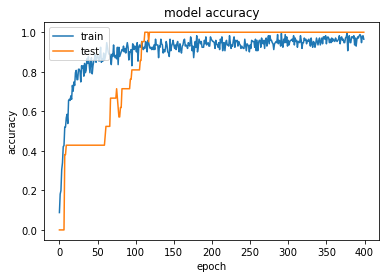

In [117]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Display model loss

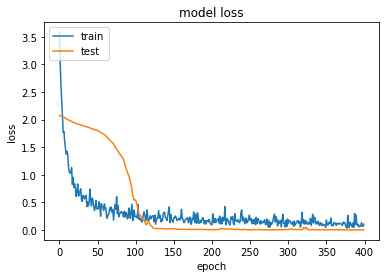

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate on the test data

In [119]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 9ms/step - loss: 0.0050 - acc: 1.0000


[0.004975397605448961, 1.0]